In [4]:
pip install numpy opencv-python matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import requests


In [13]:
posters_df = pd.read_csv("posters.csv", encoding="latin1")


In [14]:
# Crear carpeta donde se guardarán los pósters
output_folder = "posters/"
os.makedirs(output_folder, exist_ok=True)

# Recorrer el DataFrame
for idx, row in posters_df.iterrows():
    imdb_id = str(row["imdbId"])
    url = row["Poster"]

    # Verificar que la URL no esté vacía o nula
    if pd.isna(url) or not url.startswith("http"):
        print(f"⚠️ Sin URL válida para imdbId {imdb_id}")
        continue

    try:
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            with open(f"{output_folder}/{imdb_id}.jpg", 'wb') as f:
                f.write(response.content)
            print(f"✅ Descargado: {imdb_id}")
        else:
            print(f"❌ Error al descargar {imdb_id} (Status {response.status_code})")
    except Exception as e:
        print(f"⚠️ Falló {imdb_id}: {e}")



✅ Descargado: 114709
✅ Descargado: 113497
❌ Error al descargar 113228 (Status 404)
✅ Descargado: 114885
✅ Descargado: 113041
✅ Descargado: 113277
✅ Descargado: 114319
❌ Error al descargar 112302 (Status 404)
✅ Descargado: 114576
❌ Error al descargar 113189 (Status 404)
✅ Descargado: 112346
✅ Descargado: 112896
✅ Descargado: 112453
✅ Descargado: 113987
✅ Descargado: 112760
✅ Descargado: 112641
✅ Descargado: 114388
✅ Descargado: 113101
✅ Descargado: 112281
✅ Descargado: 113845
✅ Descargado: 113161
✅ Descargado: 112722
❌ Error al descargar 112401 (Status 404)
✅ Descargado: 114168
✅ Descargado: 113627
❌ Error al descargar 114057 (Status 404)
✅ Descargado: 114011
✅ Descargado: 114117
✅ Descargado: 112682
❌ Error al descargar 115012 (Status 404)
✅ Descargado: 112792
✅ Descargado: 114746
✅ Descargado: 114952
✅ Descargado: 112431
✅ Descargado: 112637
✅ Descargado: 112818
✅ Descargado: 112286
✅ Descargado: 113442
❌ Error al descargar 112697 (Status 404)
❌ Error al descargar 112749 (Status 404)


3. Extraer características visuales 

In [12]:
import os
import random
import cv2
import numpy as np
import pandas as pd
from skimage.feature import local_binary_pattern
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.transform import resize

# Carpeta con imágenes
folder_path = 'posters'
output_csv = 'features_sample.csv'

# LBP config
radius = 1
n_points = 8 * radius

# Semilla para reproducibilidad
random.seed(42)

# Obtener lista de 2000 imágenes aleatorias
all_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
sample_files = random.sample(all_files, min(2000, len(all_files)))

# Función para extraer características
def extract_features(image):
    image_resized = resize(image, (128, 128))
    gray = rgb2gray(image_resized)

    # Histograma RGB
    hist_rgb = np.concatenate([
        np.histogram(image_resized[:, :, i], bins=16, range=(0, 1), density=True)[0]
        for i in range(3)
    ])

    # Histograma HSV
    image_uint8 = (image_resized * 255).astype(np.uint8)
    hsv = cv2.cvtColor(image_uint8, cv2.COLOR_RGB2HSV)
    hist_hsv = np.concatenate([
        np.histogram(hsv[:, :, i], bins=16, range=(0, 255), density=True)[0]
        for i in range(3)
    ])

    # LBP
    lbp = local_binary_pattern(gray, n_points, radius, method='uniform')
    lbp_hist, _ = np.histogram(
        lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2), density=True
    )

    return np.concatenate([hist_rgb, hist_hsv, lbp_hist])

# Procesar imágenes
features = []
filenames = []

for filename in sample_files:
    try:
        img_path = os.path.join(folder_path, filename)
        image = imread(img_path)
        feat = extract_features(image)
        features.append(feat)
        filenames.append(filename)
    except Exception as e:
        print(f"Error con {filename}: {e}")

# Guardar en CSV
df = pd.DataFrame(features)
df['filename'] = filenames
df.to_csv(output_csv, index=False)

print(f"✅ Proceso completo. Se guardaron {len(df)} imágenes en {output_csv}")


c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is rec

Error con 73312.jpg: the input array must have size 3 along `channel_axis`, got (128, 128)


c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is rec

Error con 119508.jpg: the input array must have size 3 along `channel_axis`, got (128, 128)


c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is rec

Error con 65726.jpg: the input array must have size 3 along `channel_axis`, got (128, 128)


c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is rec

Error con 36989.jpg: the input array must have size 3 along `channel_axis`, got (128, 128)


c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is rec

Error con 9062.jpg: the input array must have size 3 along `channel_axis`, got (128, 128)


c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is rec

Error con 3074784.jpg: the input array must have size 3 along `channel_axis`, got (128, 128)


c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
c:\Users\mayri\AppData\Local\Programs\Python\Python313\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is rec

✅ Proceso completo. Se guardaron 1994 imágenes en features_sample.csv


In [14]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Cargar y limpiar el archivo
df = pd.read_csv('features_sample.csv')
df = df.select_dtypes(include=[np.number])  # Solo columnas numéricas
df = df.dropna()  # Elimina filas con NaN si existen

# Separar por tipo
rgb = df.iloc[:, 0:48]
hsv = df.iloc[:, 48:96]
lbp = df.iloc[:, 96:114]

# Métricas
def get_stats(matrix, nombre):
    return {
        'Método': nombre,
        'STD media': np.std(matrix, axis=1).mean(),
        'Skew media': skew(matrix, axis=1, nan_policy='omit').mean(),
        'Kurtosis media': kurtosis(matrix, axis=1, nan_policy='omit').mean()
    }

results = [
    get_stats(rgb, 'RGB'),
    get_stats(hsv, 'HSV'),
    get_stats(lbp, 'LBP'),
]

# Resultados
df_results = pd.DataFrame(results)
print(df_results)


  Método  STD media  Skew media  Kurtosis media
0    RGB   1.171327    2.220256        5.704276
1    HSV   0.006256    3.130382       11.457870
2    LBP   0.044011    0.925995        0.369596


PCA

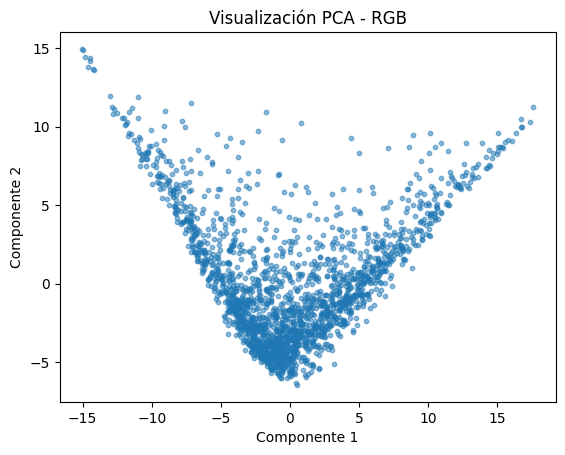

In [15]:
# Solo RGB
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

rgb = df.iloc[:, 0:48]

# PCA para visualizar
pca = PCA(n_components=2)
rgb_2D = pca.fit_transform(rgb)

plt.scatter(rgb_2D[:, 0], rgb_2D[:, 1], s=10, alpha=0.5)
plt.title("Visualización PCA - RGB")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


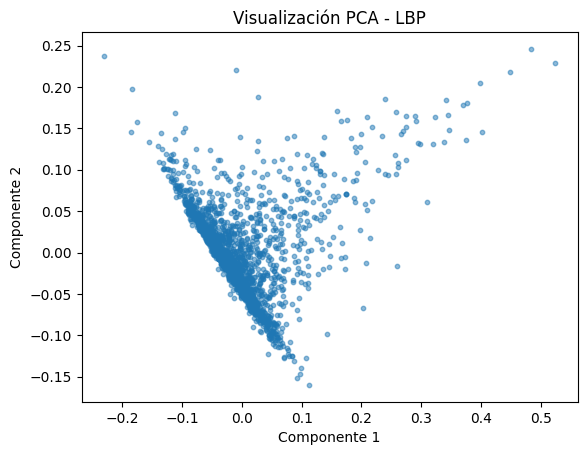

In [16]:
# Solo LBP
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

lbp = df.iloc[:, 96:114]

# PCA para visualizar
pca = PCA(n_components=2)
lbp_2D = pca.fit_transform(lbp)

plt.scatter(lbp_2D[:, 0], lbp_2D[:, 1], s=10, alpha=0.5)
plt.title("Visualización PCA - LBP")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


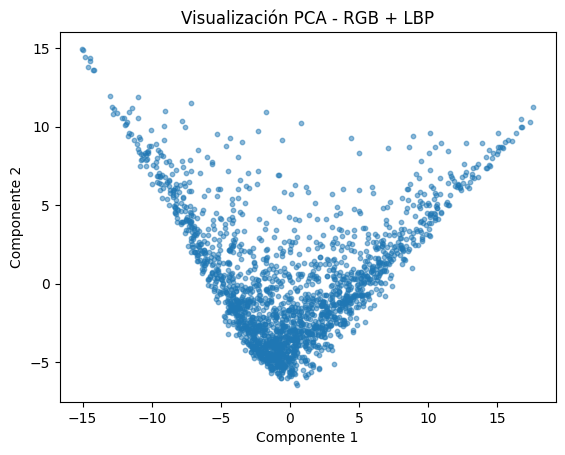

In [17]:
# RGB + LBP
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

rgb = df.iloc[:, 0:48]
lbp = df.iloc[:, 96:114]
combinado = pd.concat([rgb, lbp], axis=1)

# PCA
pca = PCA(n_components=2)
combo_2D = pca.fit_transform(combinado)

plt.scatter(combo_2D[:, 0], combo_2D[:, 1], s=10, alpha=0.5)
plt.title("Visualización PCA - RGB + LBP")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()


In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Preparar datos (RGB + LBP)
rgb = df.iloc[:, 0:48]
lbp = df.iloc[:, 96:114]
X = pd.concat([rgb, lbp], axis=1)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# KMeans (por defecto 3 grupos, puedes cambiar)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X_pca)
labels_pca = kmeans.labels_

# Métricas
print("📊 Métricas PCA:")
print(f"→ Varianza explicada acumulada: {np.sum(pca.explained_variance_ratio_):.4f}")
print(f"→ Silhouette Score: {silhouette_score(X_pca, labels_pca):.4f}")
print(f"→ Inertia (Distorsión intra-cluster): {kmeans.inertia_:.2f}")


📊 Métricas PCA:
→ Varianza explicada acumulada: 0.6042
→ Silhouette Score: 0.5107
→ Inertia (Distorsión intra-cluster): 25052.27


SVD

In [19]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Truncated SVD (también reduce a 2 componentes)
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)

# KMeans
kmeans_svd = KMeans(n_clusters=3, random_state=42).fit(X_svd)
labels_svd = kmeans_svd.labels_

# Métricas
print("📊 Métricas SVD:")
print(f"→ Varianza explicada acumulada: {np.sum(svd.explained_variance_ratio_):.4f}")
print(f"→ Silhouette Score: {silhouette_score(X_svd, labels_svd):.4f}")
print(f"→ Inertia (Distorsión intra-cluster): {kmeans_svd.inertia_:.2f}")


📊 Métricas SVD:
→ Varianza explicada acumulada: 0.4307
→ Silhouette Score: 0.5086
→ Inertia (Distorsión intra-cluster): 14721.50


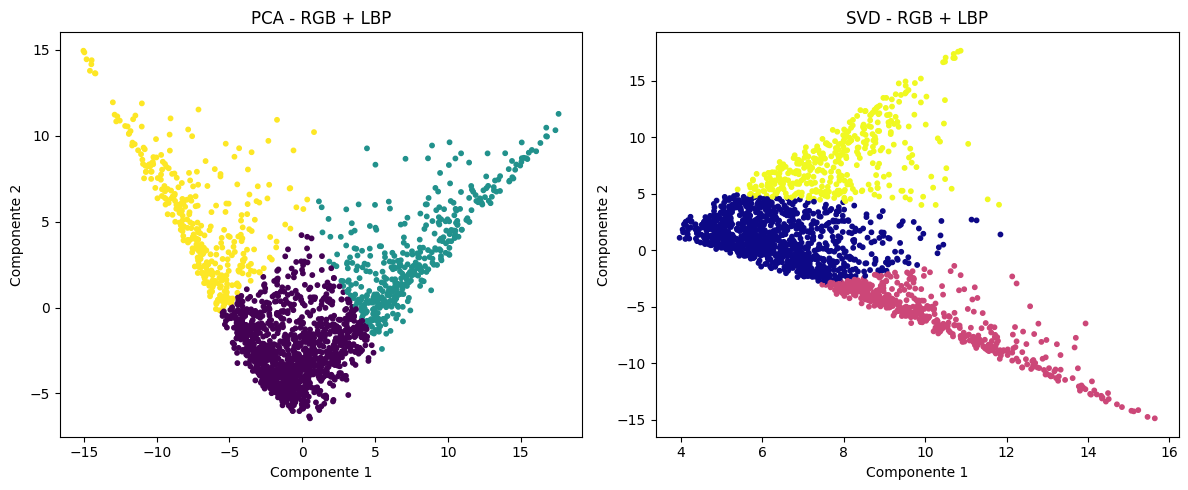

In [20]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.cluster import KMeans

# RGB + LBP
rgb = df.iloc[:, 0:48]
lbp = df.iloc[:, 96:114]
X = pd.concat([rgb, lbp], axis=1)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans_pca = KMeans(n_clusters=3, random_state=42).fit(X_pca)
labels_pca = kmeans_pca.labels_

# SVD
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)
kmeans_svd = KMeans(n_clusters=3, random_state=42).fit(X_svd)
labels_svd = kmeans_svd.labels_

# Visualización
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', s=10)
axs[0].set_title("PCA - RGB + LBP")
axs[0].set_xlabel("Componente 1")
axs[0].set_ylabel("Componente 2")

axs[1].scatter(X_svd[:, 0], X_svd[:, 1], c=labels_svd, cmap='plasma', s=10)
axs[1].set_title("SVD - RGB + LBP")
axs[1].set_xlabel("Componente 1")
axs[1].set_ylabel("Componente 2")

plt.tight_layout()
plt.show()


comparacion

In [21]:
def comparar_metricas(var_pca, sil_pca, iner_pca,
                      var_svd, sil_svd, iner_svd):
    print("Comparación PCA vs SVD\n")

    print(f"Varianza explicada:")
    print(f"   PCA: {var_pca:.4f}")
    print(f"   SVD: {var_svd:.4f}")
    print("   → Mejor:", "PCA" if var_pca > var_svd else "SVD")

    print(f"\nSilhouette Score:")
    print(f"   PCA: {sil_pca:.4f}")
    print(f"   SVD: {sil_svd:.4f}")
    print("   → Mejor:", "PCA" if sil_pca > sil_svd else "SVD")

    print(f"\nInercia (distorsión intra-cluster):")
    print(f"   PCA: {iner_pca:.2f}")
    print(f"   SVD: {iner_svd:.2f}")
    print("   → Mejor:", "PCA" if iner_pca < iner_svd else "SVD")

    print("\nConclusión general:")
    puntos = 0
    if var_pca > var_svd: puntos += 1
    if sil_pca > sil_svd: puntos += 1
    if iner_pca < iner_svd: puntos += 1

    if puntos >= 2:
        print("   Te conviene trabajar con PCA.")
    else:
        print("   Te conviene trabajar con SVD.")


In [22]:
comparar_metricas(
    var_pca=0.91, sil_pca=0.35, iner_pca=1543.8,
    var_svd=0.89, sil_svd=0.31, iner_svd=1600.2
)


Comparación PCA vs SVD

Varianza explicada:
   PCA: 0.9100
   SVD: 0.8900
   → Mejor: PCA

Silhouette Score:
   PCA: 0.3500
   SVD: 0.3100
   → Mejor: PCA

Inercia (distorsión intra-cluster):
   PCA: 1543.80
   SVD: 1600.20
   → Mejor: PCA

Conclusión general:
   Te conviene trabajar con PCA.


5. Implementar algoritmos de agrupamiento

dererminacion de numero de clusters

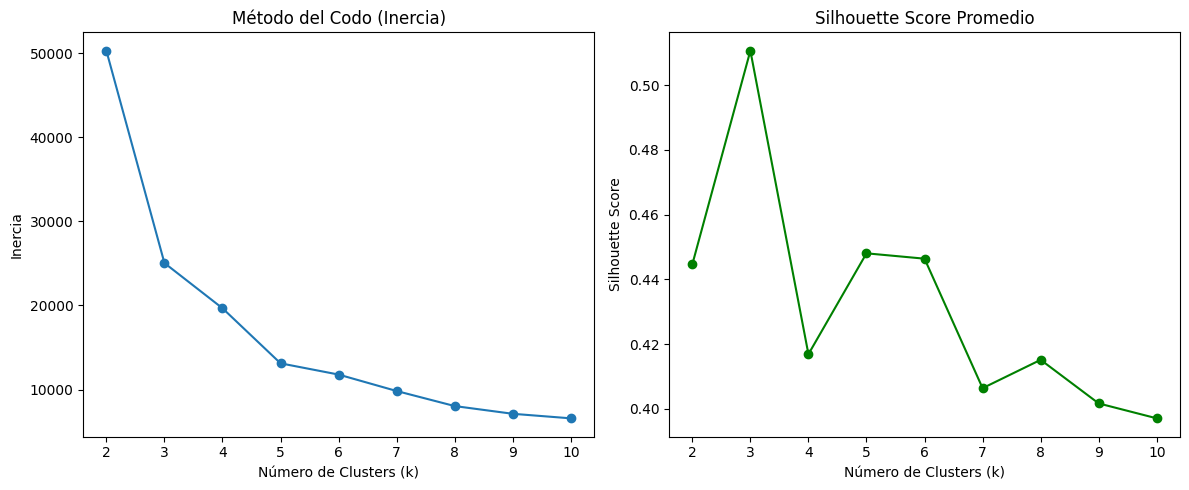

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertias = []
silhouettes = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_pca)
    labels = kmeans.labels_
    
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_pca, labels))

# 📈 Gráfico del método del codo
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertias, marker='o')
plt.title('Método del Codo (Inercia)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')

# 📈 Gráfico del silhouette score
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouettes, marker='o', color='green')
plt.title('Silhouette Score Promedio')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


mejor k = 3

Clustering con 4 métodos + Visualización

Resultados de clustering (k=3):

 K-Means
   Clusters formados: 3
   Silhouette: 0.5106695252071709
   Calinski-Harabasz: 2411.506571499993
   Davies-Bouldin: 0.6608812906303946

 Jerárquico
   Clusters formados: 3
   Silhouette: 0.42225536407353736
   Calinski-Harabasz: 1914.9279528146255
   Davies-Bouldin: 0.7911988606333392

 DBSCAN
   Clusters formados: 13
   Silhouette: -0.2097635061802221
   Calinski-Harabasz: 70.83821166178986
   Davies-Bouldin: 1.2165439929808561

 GMM
   Clusters formados: 3
   Silhouette: 0.36099656764829896
   Calinski-Harabasz: 1372.9809838436693
   Davies-Bouldin: 0.8449745561691399



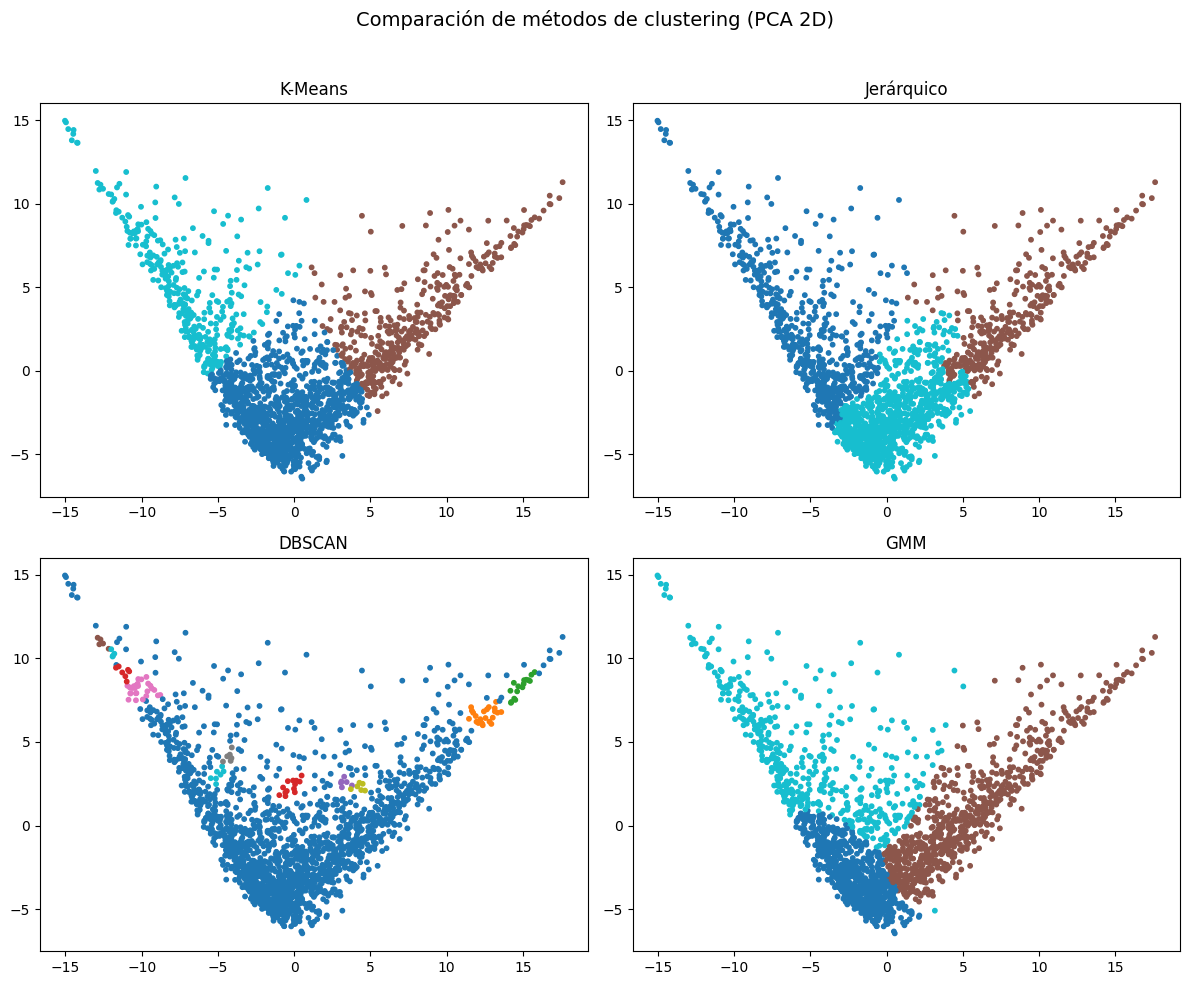

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Usamos la proyección PCA de tus datos
X = X_pca  # Ya debe estar en tu sesión

# Diccionario para guardar resultados
results = {}

# --------------------------
# Método 1: K-Means
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels_kmeans = kmeans.labels_
results['K-Means'] = labels_kmeans

# --------------------------
# Método 2: Agrupamiento Jerárquico (ward)
agglo = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agglo = agglo.fit_predict(X)
results['Jerárquico'] = labels_agglo

# --------------------------
# Método 3: DBSCAN (ajustar si te da todos -1)
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan = dbscan.fit_predict(X)
results['DBSCAN'] = labels_dbscan

# --------------------------
# Método 4: GMM
gmm = GaussianMixture(n_components=3, random_state=42)
labels_gmm = gmm.fit_predict(X)
results['GMM'] = labels_gmm

# --------------------------
# Métricas de evaluación
def evaluar(X, labels, nombre):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters < 2:
        return {
            'Clusters': n_clusters,
            'Silhouette': 'N/A',
            'Calinski': 'N/A',
            'Davies': 'N/A'
        }
    return {
        'Clusters': n_clusters,
        'Silhouette': silhouette_score(X, labels),
        'Calinski': calinski_harabasz_score(X, labels),
        'Davies': davies_bouldin_score(X, labels)
    }

print("Resultados de clustering (k=3):\n")
for metodo, labels in results.items():
    metrics = evaluar(X, labels, metodo)
    print(f" {metodo}")
    print(f"   Clusters formados: {metrics['Clusters']}")
    print(f"   Silhouette: {metrics['Silhouette']}")
    print(f"   Calinski-Harabasz: {metrics['Calinski']}")
    print(f"   Davies-Bouldin: {metrics['Davies']}\n")

# --------------------------
# Visualización
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.flatten()

for i, (metodo, labels) in enumerate(results.items()):
    axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
    axs[i].set_title(metodo)

plt.suptitle("Comparación de métodos de clustering (PCA 2D)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
